SVGの読み込みなどを試みる。

In [267]:
import svgwrite
import numpy as np
import matplotlib.pyplot as plt
import utils as U

from svgutils import Path

from tip import Tip
from vine import Vine, ClothoidVine
from leaf import Leaf

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# 空ファイル生成

# drawing = U.create_drawing()
# drawing.filename = './svg/leaf.svg'
# drawing.save()

# drawing

In [10]:
import xml.etree.ElementTree as ET

tree = ET.parse('./svg/leaf.svg')

root = tree.getroot()
path = tree.find('.//{http://www.w3.org/2000/svg}path')
commands = path.attrib['d']

In [36]:
commands

'M114.2,245.3c0,0-47.6-62.9-43.1-117.5s41.1-54.7,56.6-74.5S145,14.6,145,14.6s25,33.9,20.1,67.1  s-23.8,53.4-23.8,53.4s16.5,14.8,10.6,25.5c-9.3,16.7-30.4,28.5-30.7,49.3c-0.3,22.4,17.1,51.9,28.9,74.1L114.2,245.3z'

In [87]:
import re

ops = []
params = []

for command in re.findall('[a-zA-Z][^a-zA-Z]*', commands):
    command = command.strip()
    op = command[0]
    param = command[1:]
    param = param.replace('-', ',-').split(',')
    param = [float(p) for p in param if p != '']
    param = np.array(param).reshape(-1, 2)
    
    ops.append(op)
    params.append(param)

path = U.Path(ops, params)

In [89]:
path.draw(fill='blue')

In [266]:
path_ = Path.from_d(commands)
path = Path.from_d(commands)

path.scale(1/284)
path.translate(np.array([-0.5, -1]))
path.rotate(40)
path.scale(0.5)
path.translate(np.array([0.5, 0.5]))
path.scale(284)


dwg = path.draw()
path_.draw(dwg, stroke='red', fill='none')

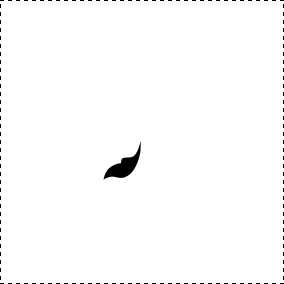

In [323]:
leaf = Leaf(
    np.array([0.5, 0.5]),
    np.array([-1, 1]),
    0.2
)
leaf.draw()

# 苦労したものの、葉っぱの自由な描画に成功した

SVGの大文字小文字の仕様に気づくのが難しかった。

# 花の描画

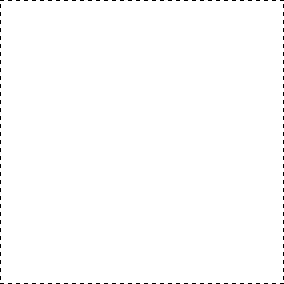

In [285]:
# # 空ファイル生成

# drawing = U.create_drawing()
# drawing.filename = './svg/flower.svg'
# drawing.save()

# drawing

In [291]:
import xml.etree.ElementTree as ET

tree = ET.parse('./svg/flower.svg')

root = tree.getroot()
black, white = tree.findall('.//{http://www.w3.org/2000/svg}path')

black = Path.from_d(black.attrib['d'])
white = Path.from_d(white.attrib['d'])

dwg = black.draw(fill='black')
white.draw(dwg, fill='white')
dwg

In [319]:
from flower import Flower

flower = Flower(
    np.array([0.5, 0.5]),
    np.array([1, 1]),
    0.3
)

flower.draw()

# 花の表示も完成した。これから、茎と合成していく。

In [331]:
vine = ClothoidVine.from_edge('bottom')
vine.create_leaf(size=0.2, side='left')
vine.create_flower(parent_pos=0.9, size=0.2)
vine.create_child(0.3, scale=1.0)
vine.draw()